In [129]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# KNN

## Titanic
Modelo que predice la probabilidad de supervivencia de los pasajeros del titanic

https://www.kaggle.com/c/titanic/data?select=train.csv

Importar data necesaria

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [56]:
test=test.merge(
    test, how="left").merge(
    gender_submission, how="left")

In [57]:
columnas_ordenadas = [col for col in train.columns if col in test.columns]
test = test[columnas_ordenadas]

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Columnas con valores nulos y cantidad de nulos en cada una.

In [52]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
def porcentaje_nulos(data):
    total_filas = len(data)
    porcentaje_nulos = data.isnull().sum() / total_filas * 100
    return porcentaje_nulos[porcentaje_nulos > 0].sort_values(ascending=False)

In [53]:
porcentaje_nulos(train)

Series([], dtype: float64)

In [54]:
porcentaje_nulos(test)

Series([], dtype: float64)

Elimino columnas con un porcentaje alto de nulos

In [58]:
train.drop(columns=["Cabin"], inplace=True)
test.drop(columns=["Cabin"], inplace=True)

Compelto valores nulos

<Axes: xlabel='Age', ylabel='Count'>

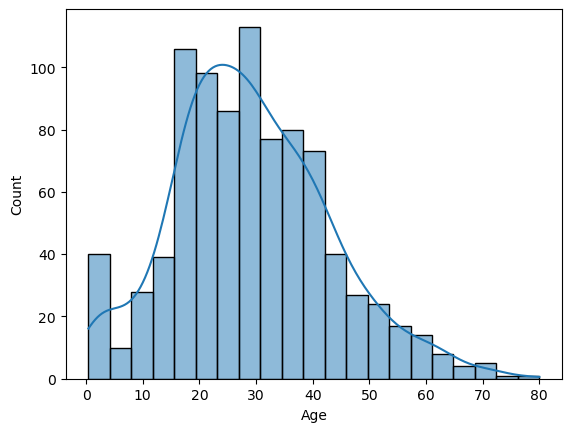

In [65]:
sns.histplot(train['Age'], kde = True)

<Axes: xlabel='Age', ylabel='Count'>

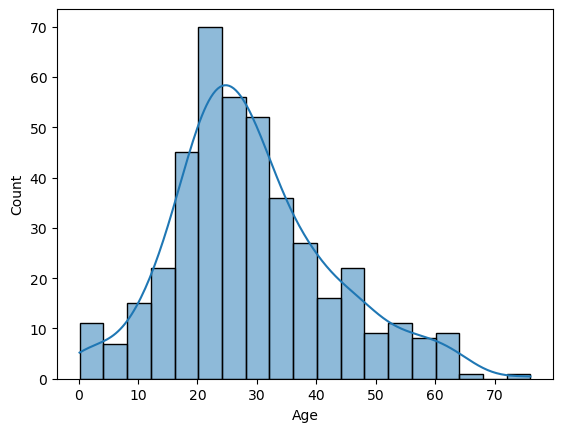

In [66]:
sns.histplot(test['Age'],kde = True)

<Axes: xlabel='Embarked', ylabel='Count'>

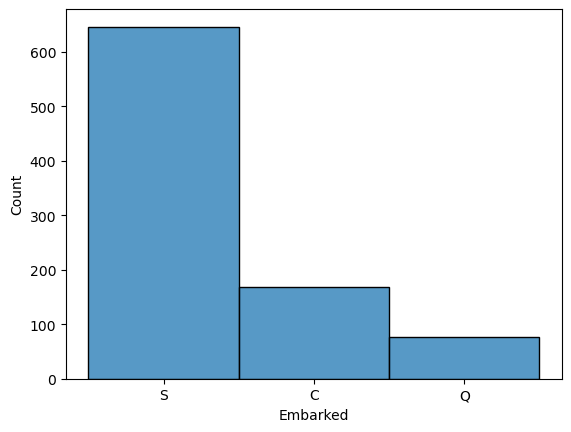

In [67]:
sns.histplot(train['Embarked'])

<Axes: xlabel='Embarked', ylabel='Count'>

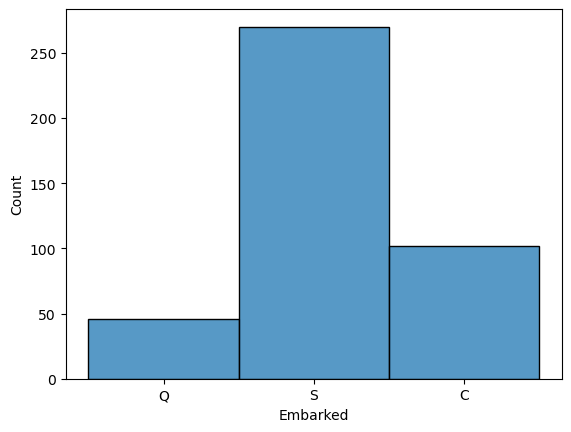

In [43]:
sns.histplot(test['Embarked'])

In [59]:
def add_age_null(dataset,colum, min_age, max_age):
    num_nulos = dataset[colum].isnull().sum()
    valores_aleatorios = np.random.randint(min_age, max_age, size=num_nulos)
    dataset.loc[dataset[colum].isnull(), colum] = valores_aleatorios

In [60]:
add_age_null(train,"Age",10,45)
add_age_null(test,"Age",10,40)

In [61]:
def rellenar_con_moda(df, columna):
    moda = df[columna].mode()[0]
    df[columna] = df[columna].fillna(moda)

In [62]:
rellenar_con_moda(train, "Embarked")
rellenar_con_moda(test, "Embarked")

In [63]:
test.loc[test.Fare.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [64]:
promedio = test.loc[test.Pclass == 3, "Fare"].mean()
test["Fare"] = test["Fare"].fillna(promedio)

Análisis exploratorio por:

    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

In [68]:
data_agrupada = train.groupby(["Pclass", "Survived"]).agg(Cantidad = ("Survived", "count")).reset_index()
data_agrupada

,Pclass,Survived,Cantidad
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


<Axes: xlabel='Pclass', ylabel='Cantidad'>

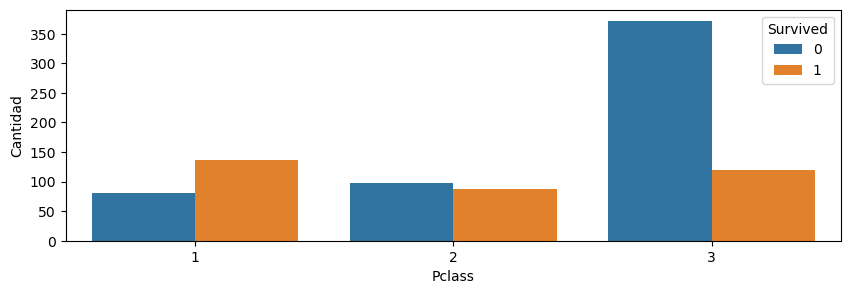

In [69]:
plt.figure(figsize = (10,3))
sns.barplot(
    data = data_agrupada, 
    x = "Pclass", 
    y = "Cantidad", 
    hue = "Survived"
)

In [70]:
data_agrupada = train.groupby(["Sex", "Survived"]).agg(Cantidad = ("Survived", "count")).reset_index()
data_agrupada

,Sex,Survived,Cantidad
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


<Axes: xlabel='Sex', ylabel='Cantidad'>

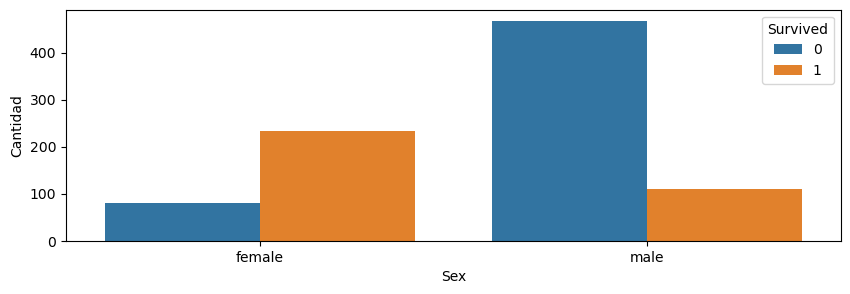

In [71]:
plt.figure(figsize = (10,3))
sns.barplot(
    data = data_agrupada, 
    x = "Sex", 
    y = "Cantidad", 
    hue = "Survived"
)

<Axes: xlabel='Age', ylabel='Count'>

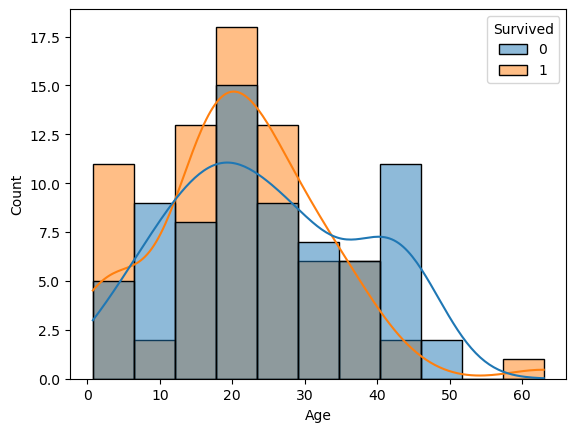

In [72]:
data_filtro = train.loc[(train.Pclass == 3) & (train.Sex == "female"), :]
sns.histplot(x=data_filtro.Age, hue = data_filtro.Survived, kde = True)

Genero variables Dummies

In [74]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [75]:
test = pd.get_dummies(
    test, 
    columns=["Pclass","Embarked","Sex"],
    drop_first = True
)

train = pd.get_dummies(
    train, 
    columns=["Pclass","Embarked","Sex"],
    drop_first = True
)

Elimino columnas del dataset que que no suman al modelo.

In [76]:
train.drop(columns=["PassengerId", "Name", "Ticket"], inplace = True)
test.drop(columns=["PassengerId", "Name", "Ticket"], inplace = True)

Añado columna  "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario.

In [78]:
train["IsMinor"] = np.where(train["Age"]<= 16, 1, 0)
test["IsMinor"] = np.where(test["Age"]<= 16, 1, 0)

In [79]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,1,0,7.2500,False,True,False,True,True,0
1,1,38.0,1,0,71.2833,False,False,False,False,False,0
2,1,26.0,0,0,7.9250,False,True,False,True,False,0
3,1,35.0,1,0,53.1000,False,False,False,True,False,0
4,0,35.0,0,0,8.0500,False,True,False,True,True,0


Ajusto el modelo

In [80]:
X_train = train.drop(columns = "Survived")
y_train = train["Survived"]

In [81]:
X_test = test.drop(columns = "Survived")
y_test = test["Survived"]

In [116]:
modelo = neighbors.KNeighborsClassifier(
    n_neighbors = 10
)
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Valido el modelo con datos de testing.

In [123]:
y_pred = modelo.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Calculo la matriz de confusión

In [124]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[219,  47],
       [ 84,  68]], dtype=int64)

In [125]:
TN = matriz_confusion[0][0] # predije que no sobrevivían y no lo hicieron = 253
TP = matriz_confusion[1][1] # predije que sobrevivían y lo hicieron = 136
FN = matriz_confusion[1][0] # predije que no sobrevivían pero si sobrevivieron = 16
FP = matriz_confusion[0][1] # predije que sobrevivían pero no lo hicieron = 13

Accuracy:

In [126]:
(TN + TP) / (TN + TP + FN + FP)

0.6866028708133971

Calcular sensibilidad:

In [127]:
TP / (TP + FN)

0.4473684210526316

Calcular especificidad:

In [128]:
TN / (TN + FP) 

0.8233082706766918